#### Import the libraries and import the dataset from the library

In [39]:
#Mini model using Kfolds
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

digits = load_digits()



####Explore the Data

(1797, 64)


<Figure size 640x480 with 0 Axes>

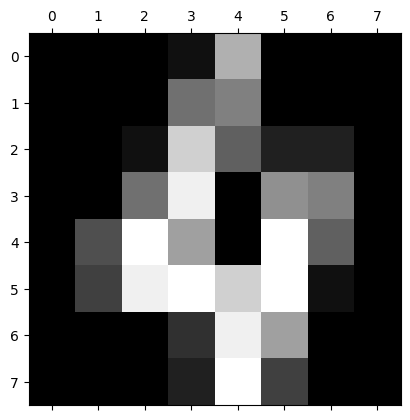

In [2]:
# optional to visualized the data using pyplot
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[4])
plt.show()

In [6]:
# Optional: explore the data set in a data frame
# see the digits.data
pd.set_option('display.max_columns', 90)

digits_data =  pd.DataFrame(digits.data)
pd.set_option('display.max_rows', 90)

digits_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [7]:
# see the digits.target
pd.set_option('display.max_rows', 50)

digits_target =  pd.DataFrame(digits.target)

digits_target.head(10)

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


#### Prepare the data for test and training groups

In [24]:
from sklearn.model_selection import train_test_split
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(digits.data, digits.target, test_size = 0.3)

#### Import the library of choice for the models 

In [25]:
# Single run logistic regression classifier model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( max_iter= 10000)
lr.fit(X_train_digits, y_train_digits)
lr.score(X_test_digits, y_test_digits)

lr_score = lr.score(X_test_digits, y_test_digits)

print("lr score:",lr_score)

# Single run support vector machine model
svm= SVC()
svm.fit(X_train_digits, y_train_digits)
svm_score = svm.score(X_test_digits, y_test_digits)

print("svm score:" + str(svm_score))

#print("svm score:")

lr score: 0.9611111111111111
svm score:0.9851851851851852


#### Set up K-fold Parameters

In [20]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3, shuffle=True) #n_splits parameter determines how many chunks to split the data into
kf


KFold(n_splits=3, random_state=None, shuffle=True)

In [26]:
#simple array data to illustrate the concept of kfold
sample_array = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

count_of_array = len(sample_array)

print("lenth of array is", count_of_array)

print(sample_array)

for train_index, test_index in kf.split(sample_array):
    print(train_index, test_index)

lenth of array is 15
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[ 0  2  4  5  6  8  9 10 11 13] [ 1  3  7 12 14]
[ 1  3  4  5  7  8  9 10 12 14] [ 0  2  6 11 13]
[ 0  1  2  3  6  7 11 12 13 14] [ 4  5  8  9 10]


#### Set up a function to get the fit score from any model

In [22]:
# The following 
def get_score(model, X_train_digits, X_test_digits, y_train_digits, y_test_digits):
    model.fit(X_train_digits, y_train_digits)
    return model.score(X_test_digits, y_test_digits)

In [27]:
# Run the function using the logistic regression as an example

get_score(LogisticRegression( max_iter= 10000), X_train_digits, X_test_digits, y_train_digits, y_test_digits)

0.9611111111111111

In [35]:
#stratified K fold will divide the folds equally by category

#from sklearn.model_selection import StratifiedKFold
# folds = StratifiedKFold(n_splits= 5)

#set up scores for Logistic Regression, SVM, and Random Forest to compare
scores_lr = []
scores_svm = []
scores_rf = []

# Te following for loop is to illustrate what a kfold does iteratively.  The loop will run the model x number of times, x = the n_splits
# A simplified Kfold class funtions will be demonstrated in a later section
# the kf alias was set up in several steps above

for train_index, test_index in kf.split(digits.data):
    X_train_digits_kf, X_test_digits_kf, y_train_digits_kf, y_test_digits_kf = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
    #append the scores to the lists
    scores_lr.append(get_score(LogisticRegression(max_iter= 10000), X_train_digits_kf, X_test_digits_kf, y_train_digits_kf, y_test_digits_kf))
    scores_svm.append(get_score(SVC(), X_train_digits_kf, X_test_digits_kf, y_train_digits_kf, y_test_digits_kf))
    scores_rf.append( get_score(RandomForestClassifier(n_estimators=40), X_train_digits_kf, X_test_digits_kf, y_train_digits_kf, y_test_digits_kf))


print(scores_lr)
print(scores_svm)
print(scores_rf)


[0.9816360601001669, 0.9565943238731218, 0.9632721202003339]
[0.993322203672788, 0.9833055091819699, 0.9833055091819699]
[0.9649415692821369, 0.9749582637729549, 0.9666110183639399]


In [31]:
#display the lr linear regression score and then average to find the best score

print(scores_lr)

from statistics import mean 

score_lr_avg = mean(scores_lr)

print(score_lr_avg)




[0.9782971619365609, 0.9532554257095158, 0.9599332220367279]
0.9638286032276016


In [33]:
#display the svm score and then average to find the best score

print(scores_svm)

score_svm_avg = mean(scores_svm)

print(score_svm_avg)

[0.989983305509182, 0.988313856427379, 0.9833055091819699]
0.9872008903728436


In [34]:
#display the random forest score and then average to find the best score
print(scores_rf)

score_rf_avg = mean(scores_rf)

print(round(score_rf_avg,3))

[0.9732888146911519, 0.9716193656093489, 0.9616026711185309]
0.969


In [40]:
#Now we do the same calculations using the cross_val_score function which bundles the for loop (as demonstrated above) into a simple code
from sklearn.model_selection import cross_val_score

cv= KFold(n_splits = 3, random_state= 4, shuffle=True)

lr = LogisticRegression(max_iter= 10000)
lr_scores = cross_val_score(lr, digits.data, digits.target, cv=cv)

print(lr_scores)

# Repeat for SVM
svm = SVC()
svm_scores = cross_val_score(svm, digits.data, digits.target, cv=cv)

print(svm_scores)

# Repeat for Ramdom Forest
rf = RandomForestClassifier(n_estimators =40)
rf_scores = cross_val_score(rf, digits.data, digits.target, cv=cv)

print(rf_scores)



[0.96160267 0.96994992 0.95158598]
[0.98998331 0.98664441 0.99165275]
[0.97662771 0.96994992 0.97161937]


In [41]:
#Now re run the entire data set using Repeated Stratified K-fold
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

cv= RepeatedStratifiedKFold(n_splits = 4, n_repeats= 4, random_state= 4)

lr = LogisticRegression(max_iter= 10000)
lr_scores = cross_val_score(lr, digits.data, digits.target, cv=cv, n_jobs = -1)


print(f"Error Mean: {np.mean(lr_scores)} Error Std:{np.std(lr_scores)}")

# Repeat for SVM
svm = SVC()
svm_scores = cross_val_score(svm, digits.data, digits.target, cv=cv)


print(f"Error Mean: {np.mean(svm_scores)} Error Std:{np.std(svm_scores)}")

# Repeat for Ramdom Forest
rf = RandomForestClassifier(n_estimators =50)
rf_scores = cross_val_score(rf, digits.data, digits.target, cv=cv)


print(f"Error Mean: {np.mean(rf_scores)} Error Std:{np.std(rf_scores)}")


Error Mean: 0.9616085127443703 Error Std:0.009134014859251305
Error Mean: 0.9867848304875031 Error Std:0.005245209053289441
Error Mean: 0.9738483667409057 Error Std:0.00771751343768581


In [42]:
# We can further tweaking the parmeters, estimators = 15
rf = RandomForestClassifier(n_estimators =15)
rf_scores = cross_val_score(rf, digits.data, digits.target, cv=cv)


print(f"Error Mean: {np.mean(rf_scores)} Error Std:{np.std(rf_scores)}")


# Tweaking parmeters, estimators = 100
rf2 = RandomForestClassifier(n_estimators =100)
rf2_scores = cross_val_score(rf2, digits.data, digits.target, cv=cv)


print(f"Error Mean: {np.mean(rf2_scores)} Error Std:{np.std(rf2_scores)}")

Error Mean: 0.9515887156644395 Error Std:0.008142721292027562
Error Mean: 0.9744057782727047 Error Std:0.007276971194038618


#### Another Kfold and Stratified Kfold example using the same digits data using a more straight forward to the simple function

In [43]:
#Kfold regular
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np 

cv= KFold(n_splits = 5, random_state= 4, shuffle=True)

model_digits = RandomForestRegressor()
scores = cross_val_score(model_digits, digits.data, digits.target, cv=cv, n_jobs = -1)

print(f"Error Mean: {np.mean(scores)} Error Std:{np.std(scores)}")

Error Mean: 0.8566507034080271 Error Std:0.027671500408285577


In [44]:
#Repeated stratified Kfold Cross Vaidation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np 

cv= RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state= 4) # you'll notice shuffle is NOT supported in the repeated stratified k-folds method

model_digits = RandomForestRegressor()
scores = cross_val_score(model_digits, digits.data, digits.target, cv=cv, n_jobs = -1)

print(f"Error Mean: {np.mean(scores)} Error Std:{np.std(scores)}")

Error Mean: 0.8669560206844308 Error Std:0.01266281605729544
